In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ad.csv')


In [7]:
df

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1
...,...,...
1995,A,0
1996,A,0
1997,A,0
1998,A,1


In [8]:
pd.crosstab(df['ad_id'], df['action'])

action,0,1
ad_id,,
A,696,304
B,628,372


In [59]:
import seaborn as sns

<AxesSubplot:xlabel='action', ylabel='Count'>

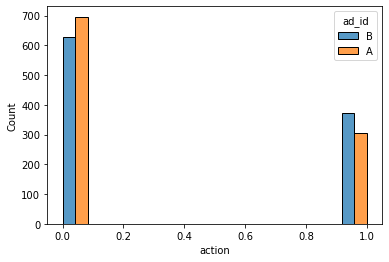

In [60]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

In [61]:
# Согласно полученным данным из датасета ad.csv 
# А - контрольная группа
# В - тестовая группа
# 0 - покупок не было
# 1 - покупка была

In [82]:
# Гипотеза:
# Отдел маркетинга изменил дизайн объявления на сайте
# Hо: p1 = p2
# H1: p1 ≠ p2
# где p1 и p2 коэффициенты конверсии старого и нового дизайна. 
# Порог доверия α = 0,05



In [62]:
372-304

68

In [63]:
# По объявлению В было совершено больше покупок 
# согласно результату суммы кликов

In [64]:
pd.crosstab(df['ad_id'], df['action'], normalize=True)

action,0,1
ad_id,,
A,0.348,0.152
B,0.314,0.186


In [65]:
0.186 - 0.152

0.034

In [66]:
# По объявлению В было совершено больше покупок на 3%

In [67]:
N1 = 1000
N2 = 1000

In [68]:
p1 = 304 / N1
p2 = 372 / N2

In [69]:
print(p1, p2)

0.304 0.372


In [70]:
p2 - p1

0.068

In [71]:
p_hat = (304+372) / (N1+N2)

In [72]:
p_hat

0.338

In [73]:
var = p_hat*(1-p_hat) * (1/N1 + 1/N2)

In [74]:
se = np.sqrt(var)

In [75]:
se

0.02115447943108031

In [ ]:
# Стандартное отклонение показывает вероятность ошибки


In [79]:
t_score = (p2-p1)/se

In [80]:
t_score

3.2144492244084213

In [ ]:
# T-распределение показывает  равенство 
# средних значений в 2-х выборках < 5

In [46]:
import scipy.stats as stats

In [47]:
stats.norm.cdf(-2)

0.022750131948179195

In [48]:
stats.norm.cdf(t_score)

0.9993465248633937

In [49]:
p_value = 1 - stats.t.cdf(t_score, df=N1+N2-2)

In [50]:
p_value

0.000663897838044214

In [51]:
alpha = 0.05
p_value > alpha

False

In [81]:
# Результат эксперимента можно считать статистически значимым и нет оснований для отклонения нулевой гипотезы

In [ ]:
# Вывод: новый дизайн рекламы работает лучше, чем старый